In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pykat
%matplotlib inline

C:\Users\tvo88\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


                                              ..-
    PyKat 1.1.277         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [118]:
code = """
l i1 1 0 n0

gauss g1 i1 n0 22m -1.2

startnode n0

mod eo1 40k 0.3 3 pm n0 n1a # phase modulator f_mod=40kHz
# midx=0.3 order=3
s space1 0.0 n1a n1b

m m1 0.95 0.01 $m1tune n1b n2 # cavity
s s2 1200 n2 n3
m m2 0.99 0.01 0 n3 n4
cav cav1 m1 n2 m2 n3
attr m2 Rc 2000 # distortions, unmatched
attr m1 xbeta 100u # curvature and misalignment
phase 0 # turn off phase adjustement
pd1 inphase 40k 0 n1b # photo diode + mixer
# f_demod=40kHz phase=0


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% PDH lock of cavity
#noplot inphase
#set err inphase re
#lock clock $err -10 .1m

%noplot clock
#put* m1 phi $clock
pd cav_pow n2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
const m1tune 0
xaxis m2 phi lin -50 50 200
maxtem off
yaxis abs

"""

In [119]:
basekat = pykat.finesse.kat() 
basekat.parse(code)

Parsing `startnode n0` into pykat object not implemented yet, added as extra line.


In [120]:
out = basekat.run()

--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:56.436730

Finished in 0.103721 seconds


100% | ETA:  0:00:00 | Calculating                                             

In [121]:
steps

array([    0.        ,  -111.11111111,  -222.22222222,  -333.33333333,
        -444.44444444,  -555.55555556,  -666.66666667,  -777.77777778,
        -888.88888889, -1000.        ])

In [122]:
steps = np.linspace(0,-1000,10)
x = []
y = []

for i in range(len(steps)):
    kat = basekat.deepcopy()
    kat.m2.Rc += steps[i]
    out = kat.run()
    
    x.append(out.x)
    y.append(out['inphase']) 
    

x = np.array(x)
y = np.array(y)

--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:56.592311


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.0767946 seconds
--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:56.674092

Finished in 0.0668223 seconds
--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:56.748893


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.0541894 seconds
--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:56.814054


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.0715656 seconds
--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:56.897547

Finished in 0.0628879 seconds
--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:56.966461


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.053257 seconds
--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:57.030645


  0% | ETA:  --:--:-- | Calculating                                            


Finished in 0.0618756 seconds
--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:57.099502

Finished in 0.0630918 seconds
--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:57.167578


 66% | ETA:  0:00:00 | Calculating                                             


Finished in 0.0538564 seconds
--------------------------------------------------------------
Running kat - Started at 2019-03-19 11:10:57.226423

Finished in 0.0595281 seconds


100% | ETA:  0:00:00 | Calculating                                             

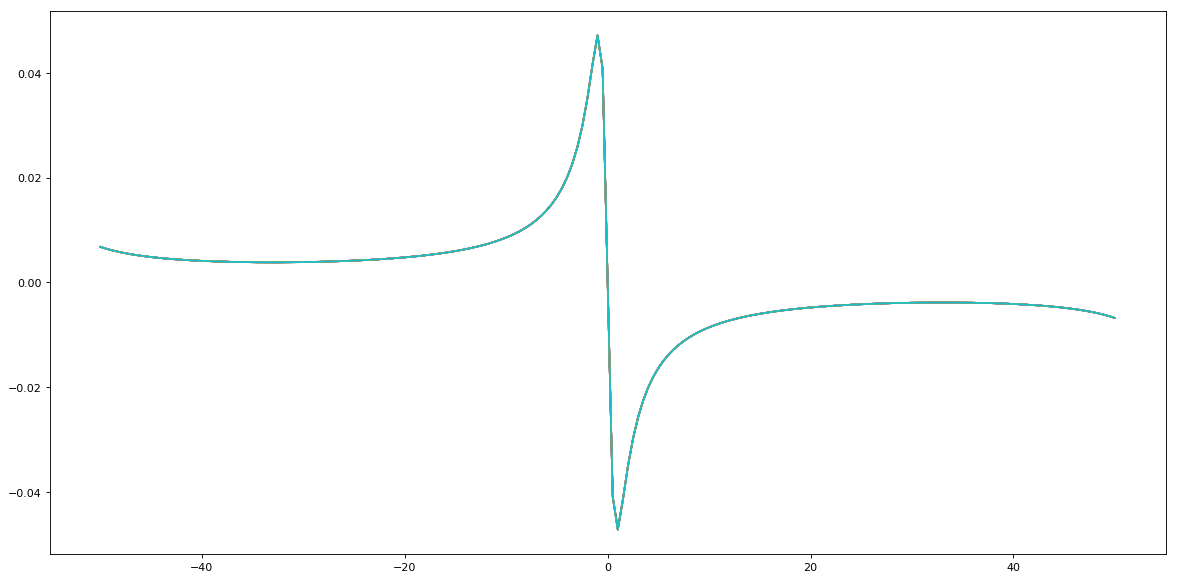

In [123]:
plt.figure(figsize=(18, 9), dpi=80)

plt.subplot(111)
for i in range(len(steps)):
    plt.plot(x[i],y[i])